# Matplotlib

파이썬에서 자료를 차트나 플롯으로 그려주는 라이브러리 패키지
    * 라인 플롯, 바 차트, 파이차트, 히스토그램, 박스 플롯, 스캐터 플롯 등을 비롯하여 다양하게 지원
    

##### 기본 그래프 영역

* Figure : 그림이 그려지는 도화지
    * 우선 Figure 를 그린 후, plt.subplots.로 도화지를 분할 > 각 부분에 그래프 그림
    * plt.figure를 명시적으로 표현해주는 것이 좋으나, plot 함수에서 자동으로 figure 생성해줌
    * 현재 figure에 접근해야하면 plt.gcf()로 접근
* 사이즈 조절
    * fig.set_size_inches(18.5, 10.5)
    * plt.figure(figsize=(10.5))
    * plt.rcParams['figure.figsize']=(10.7)
* Axes : 그래프가 그려지는 공간
* Axis : 그래프의 축

In [12]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 아래는 주피터 노트북에서 한글 폰트 꺠지는 이슈 때문에 별도로 따로 불러옴
import matplotlib as mpl
import matplotlib.font_manager as fm

In [14]:
# 아래부터는 한글 폰트를 matplotlib 에 적용하기 위한 코드

print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())

버전:  3.0.3
설치 위치:  C:\ProgramData\Anaconda3\envs\ywpython\lib\site-packages\matplotlib\__init__.py
설정 위치:  C:\Users\Affinity\.matplotlib
캐시 위치:  C:\Users\Affinity\.matplotlib


In [15]:
print ('설정파일 위치: ', mpl.matplotlib_fname())

설정파일 위치:  C:\ProgramData\Anaconda3\envs\ywpython\lib\site-packages\matplotlib\mpl-data\matplotlibrc


In [16]:
font_list_win = fm.win32InstalledFonts()
print(len(font_list_win))

474


In [18]:
[(f.name, f.fname) for f in fm.fontManager.ttflist]

[('STIXSizeOneSym',
  'C:\\ProgramData\\Anaconda3\\envs\\ywpython\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizOneSymBol.ttf'),
 ('DejaVu Sans',
  'C:\\ProgramData\\Anaconda3\\envs\\ywpython\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans-Oblique.ttf'),
 ('DejaVu Serif',
  'C:\\ProgramData\\Anaconda3\\envs\\ywpython\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSerif-Bold.ttf'),
 ('cmr10',
  'C:\\ProgramData\\Anaconda3\\envs\\ywpython\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmr10.ttf'),
 ('DejaVu Serif',
  'C:\\ProgramData\\Anaconda3\\envs\\ywpython\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSerif-BoldItalic.ttf'),
 ('STIXGeneral',
  'C:\\ProgramData\\Anaconda3\\envs\\ywpython\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXGeneral.ttf'),
 ('STIXSizeThreeSym',
  'C:\\ProgramData\\Anaconda3\\envs\\ywpython\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizThreeSymReg.ttf'),
 ('STIXN

In [20]:
# 추후 moatplotlibs 에서 한글폰트 쓰려면 밑에 kr_font 속성을 사용하면됨
# fontproperties=kr_font
# 매 요소마다 한글 폰트 달아줄 수 있음

path = 'C:\\WINDOWS\\Fonts\\HANDotum.ttf'
kr_font = fm.FontProperties(fname=path, size=18)

In [63]:
# 이거 아니면 Param 값을 통해 전역 폰트를 설정해도됨
# 내가 쓸 폰트는  ('HCR Dotum', 'C:\\WINDOWS\\Fonts\\HANDotum.ttf')

plt.rcParams["font.family"] = 'HCR Dotum'
plt.rcParams["font.size"] = 16

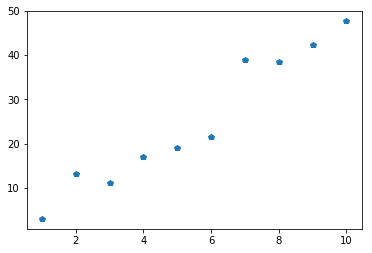

In [4]:
# matplot 작성하기
x=np.arange(1,11)
y=x*5 + np.random.randn(10)*5

plt.plot(x,y,"p") # 산점도 (기본 : blue point)
plt.show()

##### 기본 그래프 구성요소

제목과 축 레이블

* title() : 차트의 제목
* xlabel() : 차트의 x축 제목
* ylabel() : 차트의 y축 제목

메소드 옵션
    * label : 제목 텍스트
    * fontdict
        * fontsize : rcParams['axes.titlesize']
        * fontweight : rcParams['axes.titleweight']
        * verticalalignment : baseline
        * horizontalalignment : loc
    * loc : title 옵션으로 수평정렬 (기본값 : center)
        * center, left, align
    * labelpad : xlabel, ylabel 옵션으로 축과 축 제목 사이의 간격 (기본값 : None)

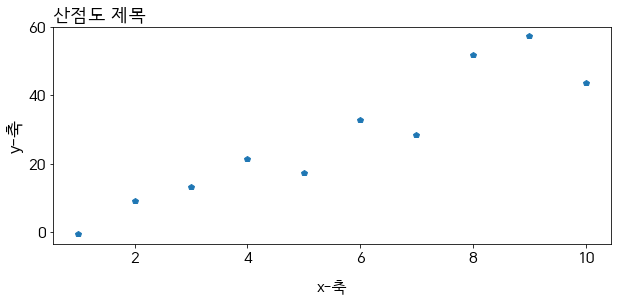

In [50]:
# 산점도 각 요소들에 이름달기

x = np.arange(1,11)
y = x*5 + np.random.randn(10)*5

plt.plot(x,y,"p")
plt.title("산점도 제목", fontdict={'fontsize':25, 'fontweight':"bold"}, fontproperties=kr_font, loc="left")
plt.xlabel("x-축", labelpad=15)
plt.ylabel("y-축", fontdict={'fontsize':10, 'fontweight':"bold"}, fontproperties=kr_font)
plt.show()

##### 범례

그래프에 여러 집단별로 그래프를 추가하는 경우, 각 집단의 구분을 위한

점,선,막대 등의 색이나 모양을 구분

* legend() : 범례

메소드 옵션
    * labels : 범례로 삽입할 제목을 순서대로 리스트 입력
    * loc : 범례 출력위치
    
        |     문자     | 코드 |
        |:------------:|:----:|
        |     best     |   0  |
        |  upper right |   1  |
        |  upper left  |   2  |
        |  lower left  |   3  |
        |  lower right |   4  |
        |     right    |   5  |
        |  center left |   6  |
        | center right |   7  |
        | lower center |   8  |
        | upper center |   9  |
        |    center    |  10  |

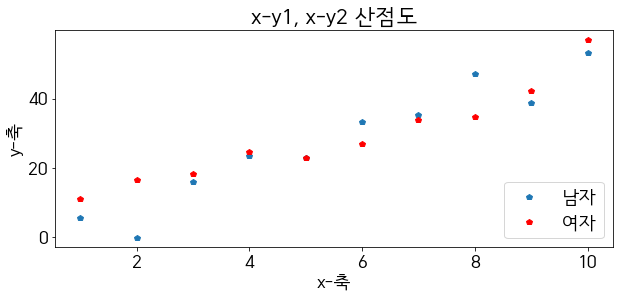

In [48]:
# 범례 추가

x = np.arange(1,11)
y1 = x*5 + np.random.randn(10)*5
y2 = 5 + x*5+np.random.randn(10)*5

plt.plot(x,y1,"p")
plt.plot(x,y2,"rp") # 산점도- red point
plt.title("x-y1, x-y2 산점도")
plt.xlabel("x-축")
plt.ylabel("y-축")
plt.legend(["남자", "여자"], loc='lower right')
plt.show()

##### 기본 함수속성

* axis() : x축, y축의 최소 최대 범위
* plt.minoticks_on() : 그래프에 보조 눈금선 표시
* grid() : 그래프에주 눈금선과 보조 눈금선의 격자 표시

메소드 옵션
    * b=False
    * which : 주 눈금선과 보조 눈금선의 격자 (기본값 : major)
        * major, minor, both
    * axis : 격자를 표시할 축 (기본값 : both)
        * both, x, y

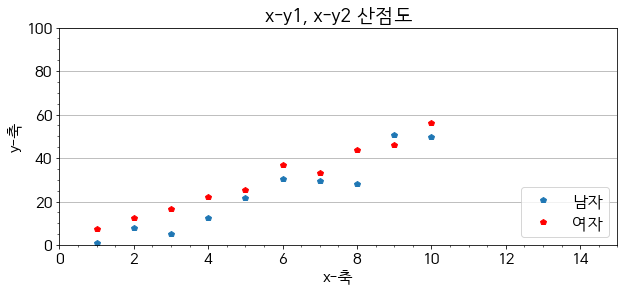

In [51]:
# size, family

x = np.arange(1,11)
y1 = x*5 + np.random.randn(10)*5
y2 = 5 + x*5+np.random.randn(10)*5

plt.plot(x,y1,"p")
plt.plot(x,y2,"rp") # 산점도- red point
plt.title("x-y1, x-y2 산점도")
plt.xlabel("x-축")
plt.ylabel("y-축")
plt.legend(["남자", "여자"], loc='lower right')
plt.axis(xmin=0, xmax=15, ymin=0, ymax=100)
plt.minorticks_on()
plt.grid(b=True, which='major', axis='y')
plt.show()

##### 막대 그래프

범주(category)로 구분되는 데이터를 이용하여 범주별로 막대를 작성

* bar() : 막대 그래프 작성

메소드 옵션
    * x : 범주
    * height
    * weight
    * color
    * edgecolor : 막대 외곽선 색
    
        | 문자 | 색 이름 |
        |:----:|:-------:|
        |   b  |   blue  |
        |   g  |  grean  |
        |   r  |   red   |
        |   c  |   cyan  |
        |   m  | magenta |
        |   y  |  yellow |
        |   k  |  black  |
        |   w  |  white  |

In [4]:
df=pd.read_csv("C:/Users/Affinity/Downloads/Python_Data/ch02_data/APTData.csv", header=0,
              skiprows=7, index_col=None, encoding="utf-8")
df.head(5)

'''

APTData 의 index list

id : 고유번호
Area : 대생활권
UseDistrict : 용도지역
Option : 풀옵션여부
FAR : 용적률(%)
Price : ㎡당평균전용임대가(천원)

'''

,id,Area,UseDistrict,Option,FAR,Price
0,apt01,도심권,제2종 일반주거지역,풀옵션형,132.72,515.051949
1,apt02,도심권,제2종 일반주거지역,풀옵션형,184.99,499.500499
2,apt03,도심권,상업지역,기본형,308.81,364.319535
3,apt04,도심권,상업지역,풀옵션형,493.08,410.945530
4,apt05,도심권,준주거지역,기본형,349.65,616.975986


동북권    140
동남권     92
서북권     81
서남권     76
도심권     11
Name: Area, dtype: int64


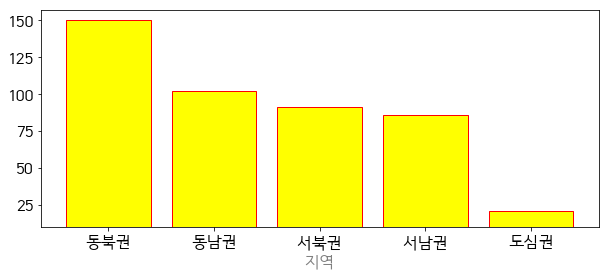

In [52]:
# 해당 도표를 막대그래프로 그려보기

AreaTb1=pd.value_counts(df["Area"])
print(AreaTb1)

# 막대그래프
plt.bar(AreaTb1.index, AreaTb1, bottom=10, color="yellow", edgecolor="red")
plt.xlabel("지역").set_color('grey')
plt.show()

##### 파이 그래프

* pie() : 원 그래프 작성

메소드 옵션
    * x : 원조각의 값
    * explode : 특정 조각 빼기 (기본값 : None)
    * labels : 각 조각별 이름 (기본값 : None)
    * colors : 각 조각의 색 (기본값 : None)
    * autopct : 퍼센트 표기 (기본값 : None)
        * 'format%pct'형식으로 입력
    * shadow : 그림자 효과로 입체값 주기 (기본값 : None)
   

동북권    140
동남권     92
서북권     81
서남권     76
도심권     11
Name: Area, dtype: int64


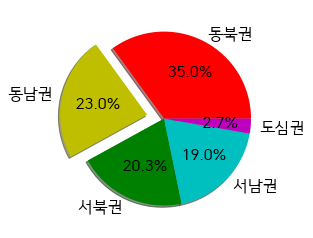

In [53]:
print(AreaTb1)

# 파이그래프
plt.pie(AreaTb1, explode=(0,0.2,0,0,0), labels=AreaTb1.index, colors=["r","y","g","c","m"], 
        autopct="%5.1f%%", shadow=True)
plt.show()

##### 박스 플롯 (상자 그래프)

자료의 중심위치 확인 / 분포 대칭성 판단 / 산포 정도 및 극단점 유무 판단

* boxplot() : 박스 플롯 작성

메소드 옵션
    * x : 상자 그래프를 작성할 데이터
    * notch : 중앙값의 신뢰구간 (기본값 : None)
    * vert : 수직방향의 그래프 (기본값 : None)
    * whis : 안쪽 울타리 값 (기본값 : 1.5)
    * labels : 항목의 이름을 리스트로 입력 (기본값 : None)

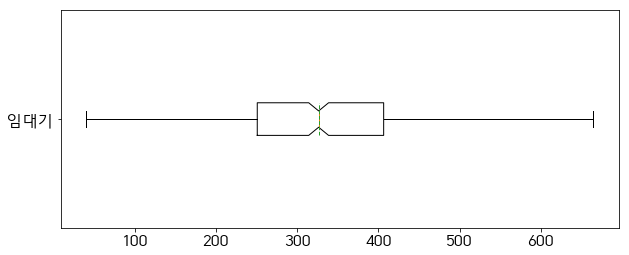

In [59]:
# 상자 그래프

plt.boxplot(df.Price, notch=True, vert=False, meanline=True, whis=2, showmeans=True, labels=["임대기"])
plt.show()

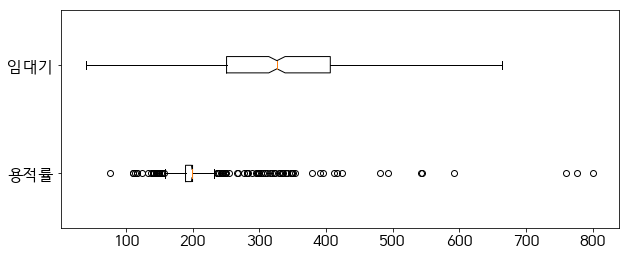

In [60]:
plt.boxplot([df.FAR, df.Price], notch=True, vert=False, whis=3, labels=["용적률", "임대기"])
plt.show()

##### 히스토그램

자료의 중심위치 및 분포상태, 치우침 정도, 산포 정도 등을 파악함

집단화된 도수분포표를 이용해서 작성한다.

막대 도표와 다르게 막대들이 계급 경계에서 서로 연결된다.

* hist() : 히스토그램 작성

메소드 옵션
    * x : 히스토그램 작성할 데이터
    * bins : 계급 수 또는 계급의 구간 (기본값 : None)
    * range : x축의 최대 최소 설정 (기본값 : None)
    * density : y축 값을 빈도 또는 밀도로 작성여부 (기본값 : None)
    * cumulative : 누적값 도표 작성여부 (기본값 : None)

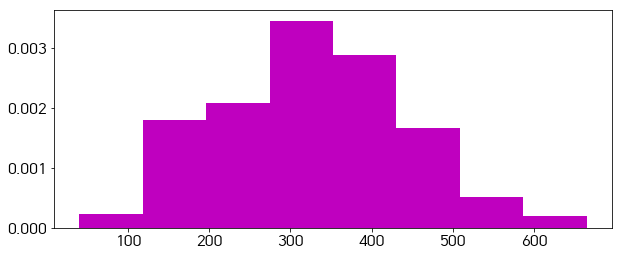

In [64]:
# 히스토그램 작성

plt.hist(df.Price, bins=8, color="m", density=True)
plt.show()

##### 산점도

두 변수 사이의 관계를 파악하고자 할 때 사용

* plot() : 산점도 작성

메소드 옵션
    * x : 산점도 x축 데이터
    * y : 산점도 y축 데이터
    * color
    * marker : 점 모양
    * linestyle : 선 모양
    * 색과 점 모양, 선 모양은 문자열 형식으로 지정가능
        * 점모양
        
        | 문자 | 설명                  | 문자 | 설명                |
        |------|-----------------------|------|---------------------|
        | '.'  | point marker          | 's'  | square marker       |
        | ','  | pixel marker          | 'p'  | pentagon marker     |
        | 'o'  | circle marker         | '*'  | star marker         |
        | 'v'  | triangle_down marker  | 'h'  | hexagon1 marker     |
        | '^'  | triangle_up marker    | 'H'  | hexagon2 marker     |
        | '<'  | triangle_left marker  | '+'  | plus marker         |
        | '>'  | triangle_right marker | 'x'  | x marker            |
        | '1'  | tri_down marker       | 'D'  | diamond marker      |
        | '2'  | tri_up marker         | 'd'  | thin_diamond marker |
        | '3'  | tri_left marker       | '|'  | vline marker        |
        | '4'  | tri_right marker      | '_'  | hline marker        |
        
        * 선모양
        
        | 문자 | 설명              | 문자 | 설명                |
        |------|-------------------|------|---------------------|
        | '-'  | solid line style  | '-.' | dash-dot line style |
        | '--' | dashed line style | ':'  | dotted line style   |

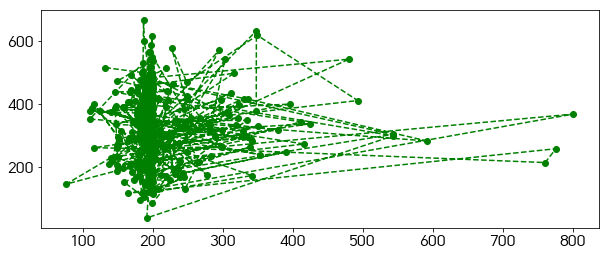

In [68]:
# 선점도

plt.plot(df.FAR, df.Price, color='green', marker='o', linestyle='dashed')
# green 의 g, marker 의 o, dahsed 의 -- 를 위에 언급한 단축문자로 표기가능
# plt.plot(df.FAR, df.Price, "go--")
plt.show()

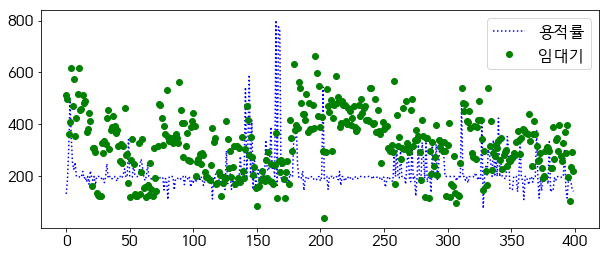

In [73]:
# 여러 데이터들을 표기한 산점도

plt.plot(df.FAR, "b:")
plt.plot(df.Price, "go")
plt.legend(["용적률", "임대기"], loc='upper right')
plt.show()